# Imports

In [1]:
import numpy as np
import os
import pandas as pd
import plotnine as gg
gg.theme_set(gg.theme_classic)

## Directories etc.

In [2]:
data_save_path = "C:/Users/maria/MEGAsync/SLCNdata/Meta/all_data"
plot_save_path = "C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots"
if not os.path.exists(plot_save_path):
    os.makedirs(plot_save_path)

# Get data

In [3]:
all_data = pd.read_csv(os.path.join(data_save_path, 'all_data.csv'), index_col=0)
all_data_z = pd.read_csv(os.path.join(data_save_path, 'all_data_z.csv'), index_col=0)
all_data_long = pd.read_csv(os.path.join(data_save_path, 'all_data_long.csv'), index_col=0)
all_data_long_z = pd.read_csv(os.path.join(data_save_path, 'all_data_long_z.csv'), index_col=0)

# Descriptives

## Sample age distribution

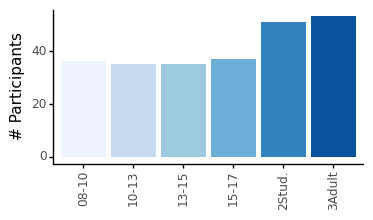

<ggplot: (127162425155)>

In [4]:
gg.options.figure_size = (4, 2)
g = (gg.ggplot(all_data, gg.aes('age_group_', fill='factor(age_group_)'))
     + gg.geom_bar()
#      + gg.geom_text(
#          gg.aes(label=gg.mapping.after_stat('count')),
#          stat='count',
#          nudge_y=0.125,
#          va='bottom'
#      )
     + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5), legend_position='none')
     + gg.labs(x='', y='# Participants', fill='')
     + gg.scale_fill_brewer()
)
g

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 4 x 2 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\0_AgegroupHistogram.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 4 x 2 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\0_AgegroupHistogram.svg


C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\0_AgegroupHistogram.pdf


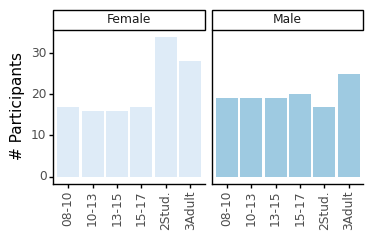

<ggplot: (127156082670)>

In [5]:
g = g + gg.aes(fill='factor(sex)') + gg.facet_grid('~ sex')
g.save(os.path.join(plot_save_path, '0_AgegroupHistogram.png'))
g.save(os.path.join(plot_save_path, '0_AgegroupHistogram.svg'))
print(os.path.join(plot_save_path, '0_AgegroupHistogram.pdf'))
g

In [6]:
print("Number of participants: {}".format(all_data.shape[0]))
print("Females: {}; Males: {}".format(
    all_data.loc[all_data['sex'] == 'Female'].shape[0], all_data.loc[all_data['sex'] == 'Male'].shape[0]))

Number of participants: 247
Females: 128; Males: 119


In [7]:
all_data.loc[(all_data['PreciseYrs'] < 18) & (all_data['sex'] == 'Male')].shape[0]

77

In [8]:
all_data.groupby(['age_group_']).size()

age_group_
08-10     36
10-13     35
13-15     35
15-17     37
2Stud.    51
3Adult    53
dtype: int64

In [9]:
all_data.groupby(['sex', 'age_group_']).size()

sex     age_group_
Female  08-10         17
        10-13         16
        13-15         16
        15-17         17
        2Stud.        34
        3Adult        28
Male    08-10         19
        10-13         19
        13-15         19
        15-17         20
        2Stud.        17
        3Adult        25
dtype: int64

## Distributions of all features

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 20 x 20 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\0_FeatureDistributions.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\facets\facet.py:549: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\facets\facet.py:555: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 20 x 20 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: 

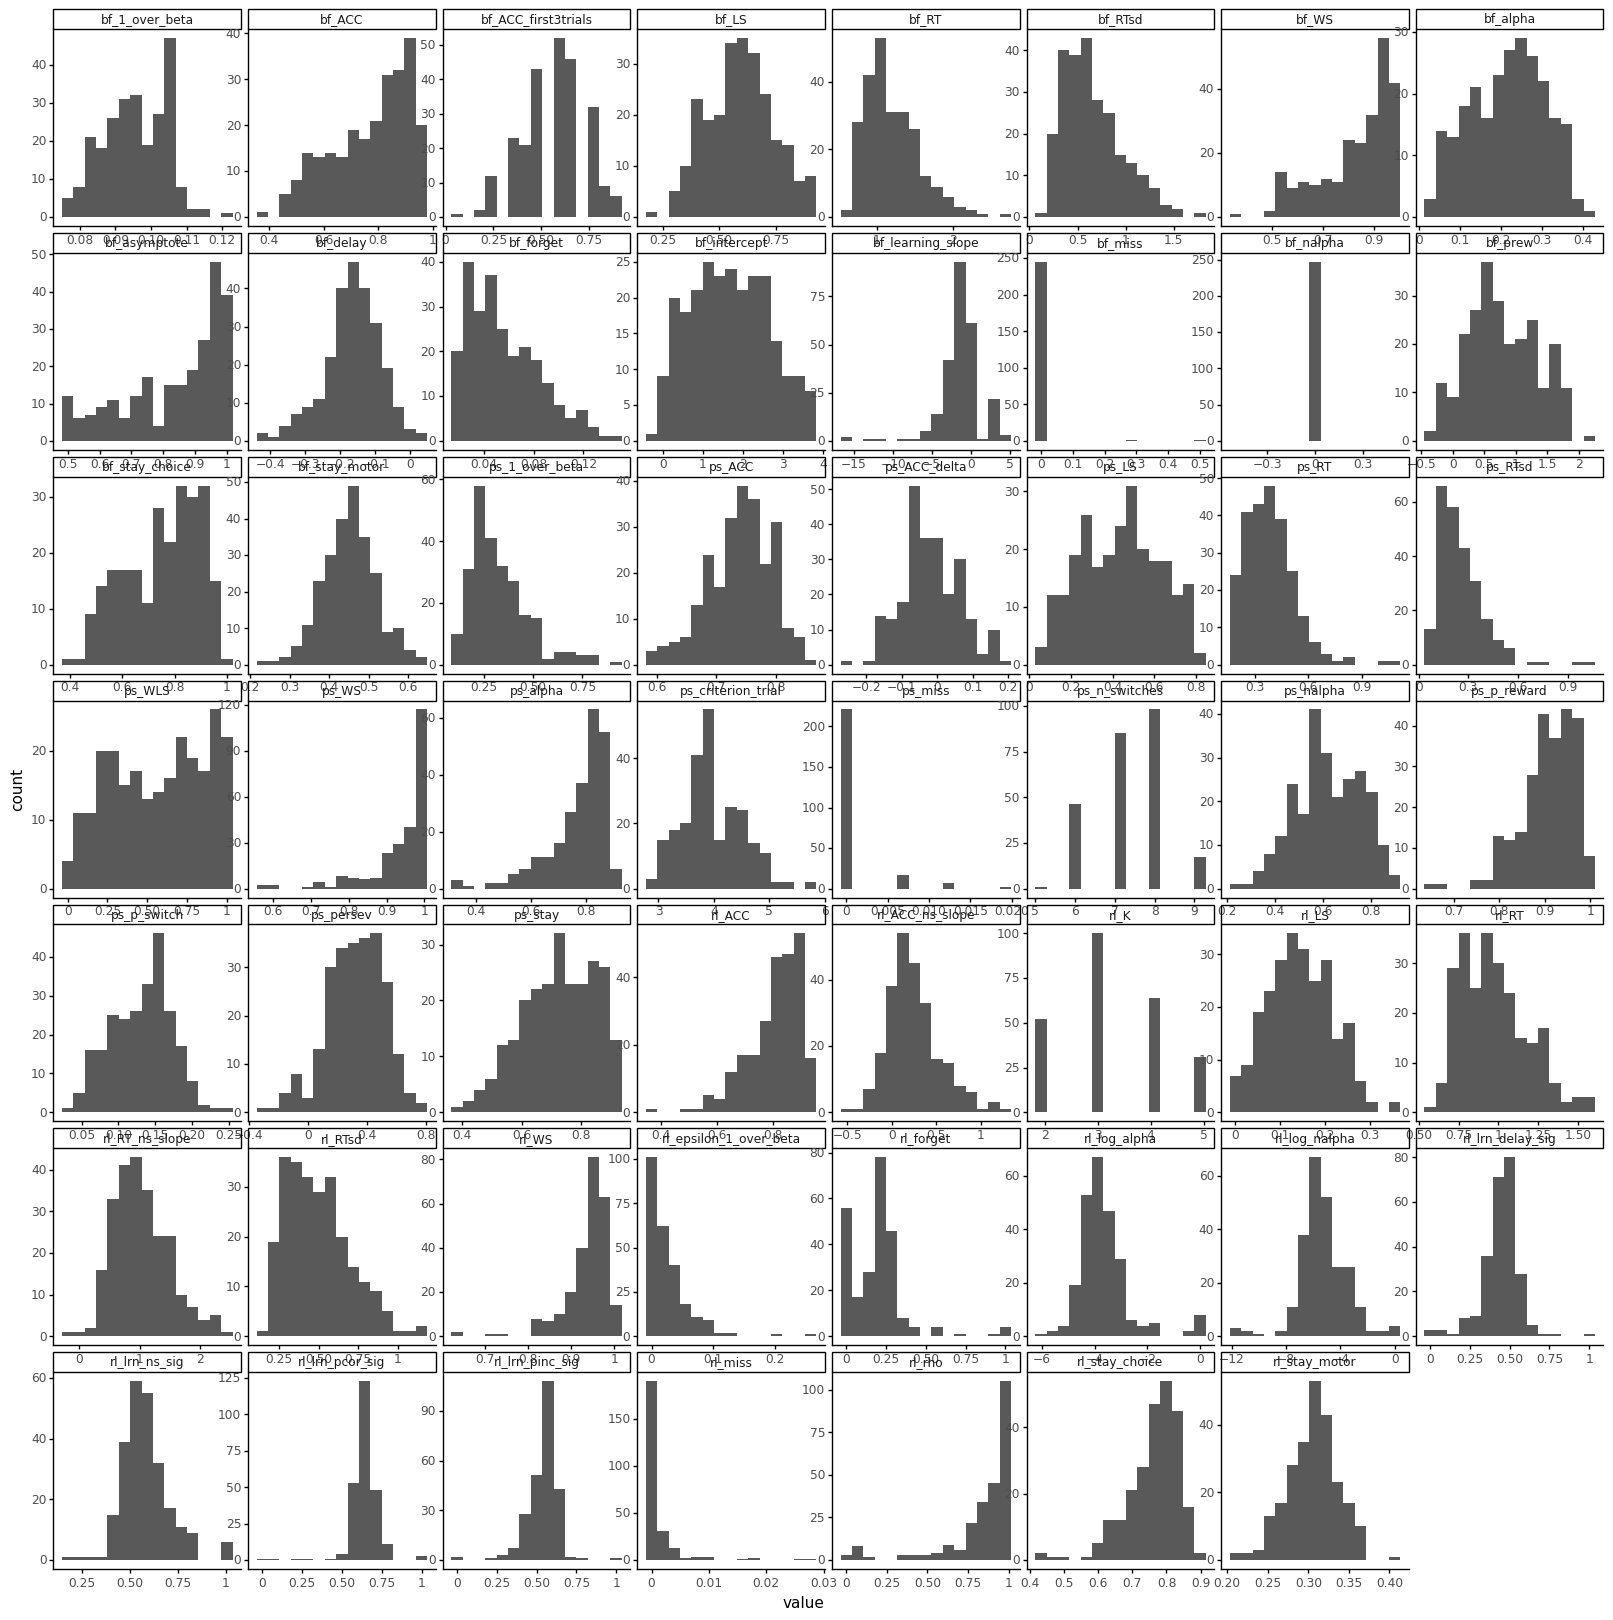

<ggplot: (127162808968)>


In [10]:
gg.options.figure_size = (20, 20)

g = (gg.ggplot(all_data_long, gg.aes('value'))
     + gg.geom_histogram(bins=15)
     + gg.facet_wrap('~ feature', scales='free')
    )
g.save(os.path.join(plot_save_path, '0_FeatureDistributions.png'))
g.save(os.path.join(plot_save_path, '0_FeatureDistributions.svg'))
print(g)

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 10 x 10 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\0_FeatureMeans.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\facets\facet.py:555: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\facets\facet.py:555: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


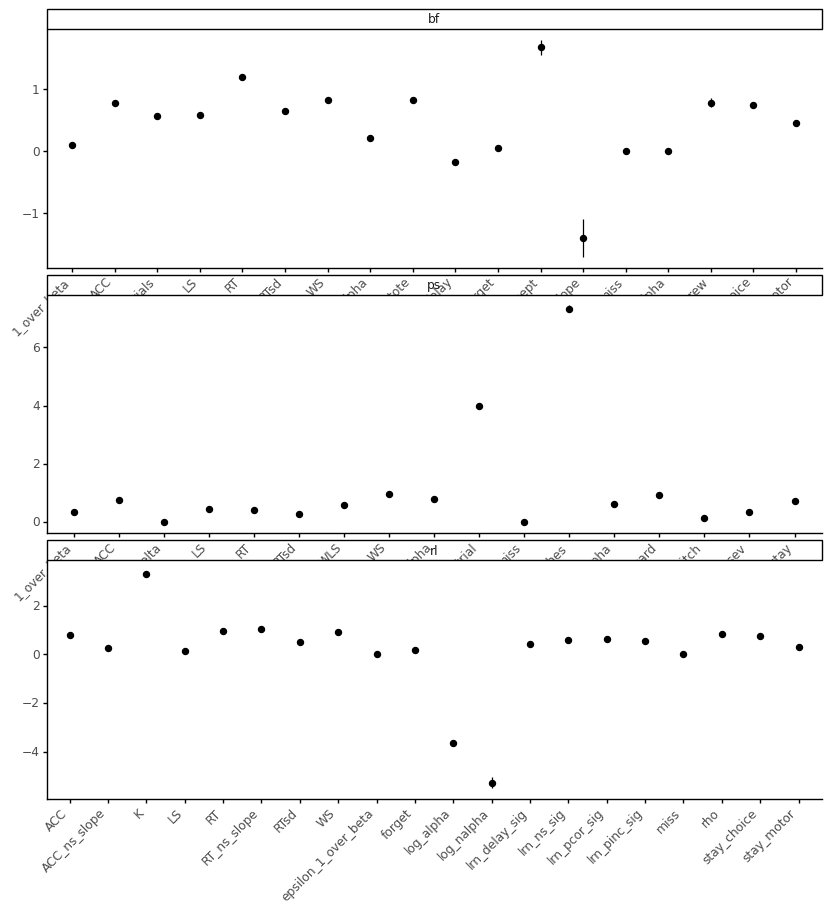

<ggplot: (127170157626)>

In [11]:
# Mean of each feature
gg.options.figure_size = (10, 10)
g = (gg.ggplot(all_data_long, gg.aes('param', 'value'))
     + gg.stat_summary()
     + gg.labs(x='', y='')
     + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
     + gg.facet_wrap('~ task', scales='free', ncol=1)
    )
g.save(os.path.join(plot_save_path, '0_FeatureMeans.png'))
g